# ProDomino Example Notebook

In [1]:
import numpy as np
import os
import sys
import seaborn as sns
from pathlib import Path
custom_params = {"axes.spines.right": False, "axes.spines.top": False, 'axes.linewidth': 1}
sns.set_theme(context="paper",
              style='ticks',
              palette="Blues_r", rc=custom_params)
lw = 1
lw = 1
fs = 6
hi = 6.69291
wi = 7.08661
nr = 5

sns.set_context("paper", rc={"font.size": fs,
                             "axes.titlesize": fs + 1,
                             "axes.labelsize": fs,
                             'axes.linewidth': 1,
                             "xtick.labelsize": fs,
                             "ytick.labelsize": fs,
                             "legend.fontsize": fs,
                             "legend.title_fontsize": fs + 1,
                            'lines.markersize' : 2})

sys.path.append('src')
from ProDomino import Embedder, ProDomino


mlp_chkpt = 'checkpoints/main_checkpoint.ckpt' 

import torch 
torch.cuda.set_per_process_memory_fraction(0.5, device=0)
embedder = Embedder()
model = ProDomino(
    mlp_chkpt,'mini_3b_mlp')

def load_fasta(fasta_path):
    with open(fasta_path, 'r') as f:
        lines = f.readlines()
        return ''.join(line.strip() for line in lines if not line.startswith(">"))

def process_directory(input_dir):
    input_dir = Path(input_dir)

    for pdb_file in input_dir.glob("*.pdb"):
        basename = pdb_file.stem

        if "_" not in basename:
            print(f"Skipping {pdb_file.name}: missing chain info")
            continue

        chain_id = basename.split("_")[1]

        fasta_file = input_dir / f"{basename}.fasta"
        if not fasta_file.exists():
            print(f"No FASTA for {pdb_file.name}")
            continue

        sequence = load_fasta(fasta_file)

        print(f"Processing {pdb_file.name} (Chain {chain_id})")
        run_prodomino(sequence, pdb_file, chain_id)

def run_prodomino(sequence, pdb_id, chain_id):
    embed = embedder.predict_embedding(sequence)
    pred = model.predict_insertion_sites(embed)
    
    pred.add_sequence(sequence)
    pred.show_trace(show_top_hits=False)
    
    pred.add_pdb_file(pdb_id,shift=0,chain_id=chain_id)
    pred.generate_insertion_site_pdb_file()
    pred.show_pdb()
    
    ### Saving
    
    from Bio.PDB import PDBParser, PDBIO

    #MODIFY OUTPUT PATH AS NEEDED
    output_path = './test'
    pdbio = PDBIO()
    pdbio.set_structure(pred.pdb)
    name = pdb_id.stem
    os.makedirs(os.path.join(output_path),exist_ok=True)
    pdbio.save(os.path.join(output_path,f'{name}.pdb'))
    np.save(os.path.join(output_path,f'{name}.npy'),pred.predicted_sites)

Processing 5H5J_B.pdb (Chain B)
97


/home/aed10/.conda/envs/prodomino/lib/python3.10/site-packages/fairscale/nn/data_parallel/fully_sharded_data_parallel.py:2562: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  if data.storage().size() > 0:


tensor([0.4700, 0.6415, 0.2079, 0.1354, 0.1819, 0.2348, 0.0576, 0.0610, 0.6218,
        0.3289, 0.3360, 0.2434, 0.1480, 0.1672, 0.0497, 0.1274, 0.0434, 0.0830,
        0.0256, 0.0908, 0.1409, 0.1436, 0.2079, 0.0256, 0.0154, 0.0062, 0.0202,
        0.0214, 0.0166, 0.0328, 0.2293, 0.0255, 0.0516, 0.0250, 0.0200, 0.0104,
        0.0087, 0.0033, 0.0096, 0.0227, 0.0031, 0.0270, 0.0066, 0.0090, 0.0376,
        0.0108, 0.0117, 0.0184, 0.0095, 0.0156, 0.0368, 0.0410, 0.0865, 0.0256,
        0.0271, 0.1197, 0.0098, 0.0577, 0.0294, 0.1251, 0.1849, 0.0655, 0.0326,
        0.0161, 0.0078, 0.0396, 0.1544, 0.1958, 0.0479, 0.0559, 0.0612, 0.0386,
        0.0388, 0.0089, 0.0090, 0.0019, 0.0105, 0.0026, 0.0039, 0.0065, 0.0031,
        0.0047, 0.0124, 0.0232, 0.0391, 0.0116, 0.0326, 0.0094, 0.0139, 0.0236,
        0.0178, 0.0943, 0.0365, 0.1208, 0.0415, 0.0408, 0.0727])


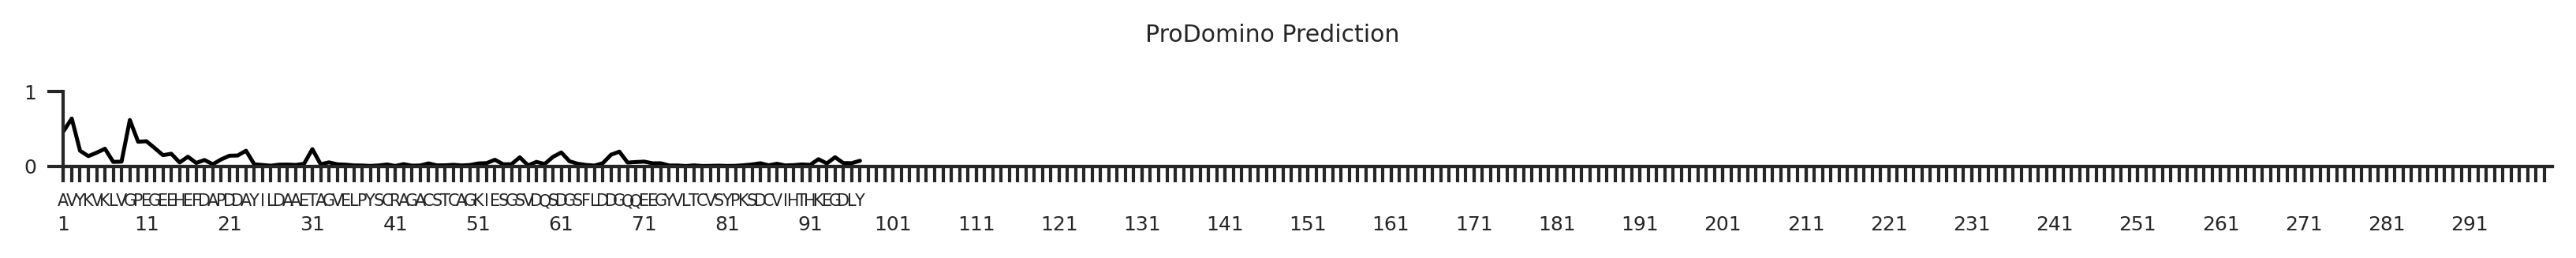

SEQ: AVYKVKLVGPEGEEHEFDAPDDAYILDAAETAGVELPYSCRAGACSTCAGKIESGSVDQSDGSFLDDGQQEEGYVLTCVSYPKSDCVIHTHKEGDLY
PDB: AVYKVKLVGPEGEEHEFDAPDDAYILDAAETAGVELPYSCRAGACSTCAGKIESGSVDQSDGSFLDDGQQEEGYVLTCVSYPKSDCVIHTHKEGDLY



/home/aed10/.conda/envs/prodomino/lib/python3.10/site-packages/Bio/PDB/Polypeptide.py:144: BiopythonDeprecationWarning: 'three_to_one' will be deprecated in a future release of Biopython in favor of 'Bio.PDB.Polypeptide.protein_letters_3to1'.
  warnings.warn(


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Processing 5H8Y_E.pdb (Chain E)
98
tensor([0.2522, 0.6327, 0.1093, 0.0670, 0.0702, 0.0931, 0.0210, 0.0384, 0.1828,
        0.1927, 0.0983, 0.2234, 0.1511, 0.0588, 0.1142, 0.0840, 0.0838, 0.0590,
        0.0961, 0.2071, 0.3179, 0.2480, 0.0426, 0.0346, 0.0096, 0.0172, 0.0388,
        0.0195, 0.0167, 0.0780, 0.0498, 0.0288, 0.0238, 0.0208, 0.0082, 0.0077,
        0.0038, 0.0088, 0.0225, 0.0036, 0.0617, 0.0124, 0.0303, 0.0436, 0.0134,
        0.0197, 0.0209, 0.0121, 0.0176, 0.0560, 0.0219, 0.0443, 0.0520, 0.0294,
        0.1606, 0.0144, 0.0919, 0.0346, 0.2871, 0.4131, 0.0752, 0.0473, 0.0193,
        0.0099, 0.0484, 0.1942, 0.1945, 0.0536, 0.0675, 0.0452, 0.0415, 0.0457,
        0.0213, 0.0143, 0.0033, 0.0131, 0.0046, 0.0130, 0.0085, 0.0137, 0.0081,
        0.0164, 0.0272, 0.0510, 0.0136, 0.0318, 0.0081, 0.0117, 0.0180, 0.0122,
        0.0649, 0.0414, 0.1162, 0.0458, 0.0862, 0.3150, 0.5268, 0.4062])


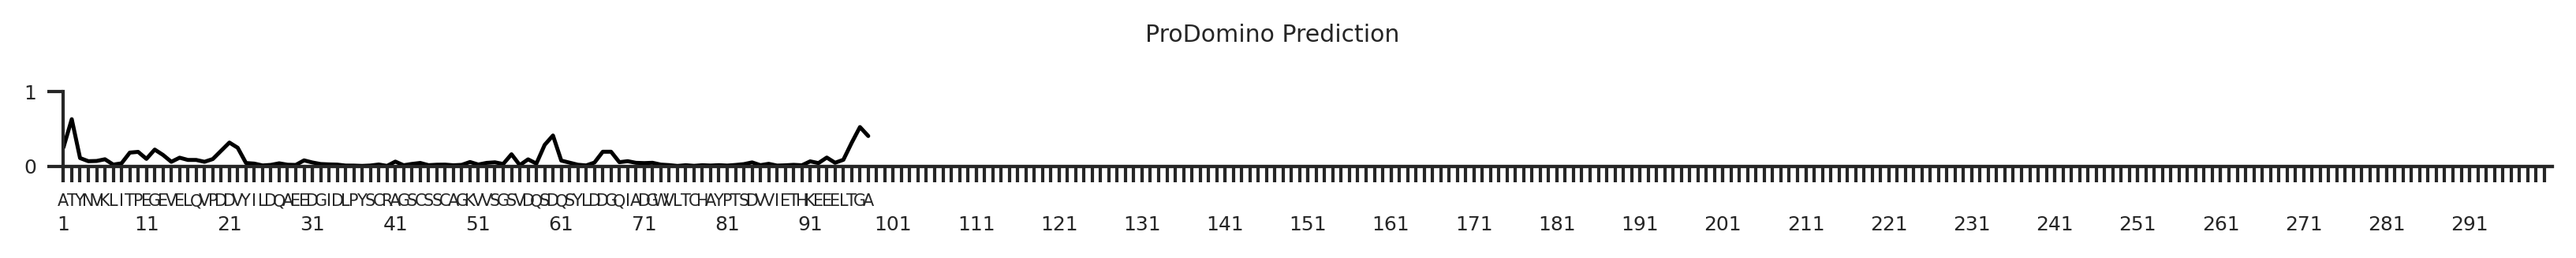

SEQ: ATYNVKLITPEGEVELQVPDDVYILDQAEEDGIDLPYSCRAGSCSSCAGKVVSGSVDQSDQSYLDDGQIADGWVLTCHAYPTSDVVIETHKEEELTGA
PDB: ATYNVKLITPEGEVELQVPDDVYILDQAEEDGIDLPYSCRAGSCSSCAGKVVSGSVDQSDQSYLDDGQIADGWVLTCHAYPTSDVVIETHKEEELT  



/home/aed10/.conda/envs/prodomino/lib/python3.10/site-packages/Bio/PDB/Polypeptide.py:144: BiopythonDeprecationWarning: 'three_to_one' will be deprecated in a future release of Biopython in favor of 'Bio.PDB.Polypeptide.protein_letters_3to1'.
  warnings.warn(


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [2]:
#THE INPUT DIRECTORY NEEDS PDB FILES AND FASTA FILES NAMED IN THE FOLLOWING WAY: <PDB_ID>_<CHAIN_NAME>.pdb AND <PDB_ID>_<CHAIN_NAME>.fasta
process_directory("./protein_files")

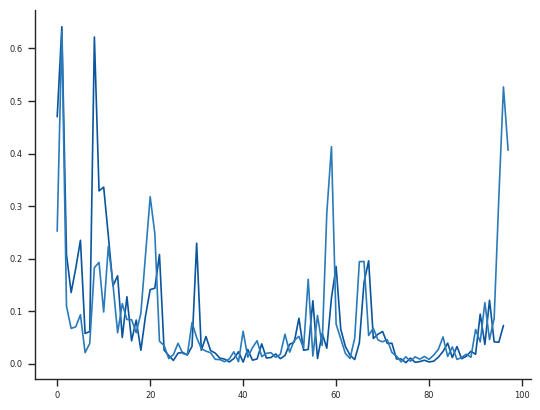

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

result_files = Path("./test")
for file in result_files.glob("*.npy"):
    data = np.load(file)
    plt.plot(data)

In [ ]:
npy_file = np.load('./test/3AOP_A.npy')

np.savetxt('./test/SIR_output_predictions.csv', npy_file, delimiter=',')